### (1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비하기

In [2]:
cancer = load_breast_cancer()

### (3) 데이터 이해하기



In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer_data = cancer.data

In [5]:
cancer_target = cancer.target

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
import pandas as pd
cancer_df = pd.DataFrame(data = cancer_data, columns=cancer.feature_names)
cancer_df["label"] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
cancer_df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

### 데이터 분류

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


### 모델 학습 및 평가

In [17]:
!pip install pydot

classifier
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

accuracy: 0.9122807017543859


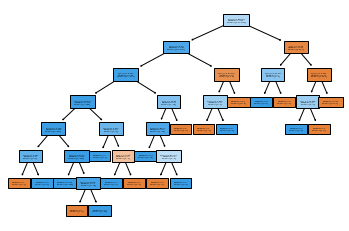

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_dtree = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred_dtree))
acc_dtree = accuracy_score(y_test, y_pred_dtree)
print("accuracy:" ,acc_dtree)

plt.figure()
tree.plot_tree(decision_tree, filled=True,fontsize=2,impurity=False)
plt.show()

In [19]:
from sklearn import svm
svm_model = svm.SVC(random_state=32)

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
FileNotFoundError: [Errno 2] "dot" not found in 

print(classification_report(y_test, y_pred_svm))# 코드를 입력하세요
acc_svm = accuracy_score(y_test, y_pred_svm)
print("accuracy:" ,acc_svm)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114

accuracy: 0.9035087719298246


In [20]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred_randf =random_forest.predict(X_test)

print(classification_report(y_test, y_pred_randf))
acc_randf = accuracy_score(y_test, y_pred_randf)
print("accuracy:" ,acc_randf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

accuracy: 1.0


In [21]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=32)

sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred_randf))
acc_sgd = accuracy_score(y_test, y_pred_sgd)
print("accuracy:" ,acc_sgd)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

accuracy: 0.8947368421052632


In [22]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=35)

logistic_model.fit(X_train, y_train)
y_pred_logist = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred_logist))# 코드를 입력하세요
accuracy_score(y_test, y_pred_logist)
acc_logistic = accuracy_score(y_test, y_pred_logist)
print("accuracy:" ,acc_logistic)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

accuracy: 0.9473684210526315


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
acc_li = {'acc_dtree':acc_dtree,
          'acc_logistic':acc_logistic,
          'acc_randf':acc_randf,
          'acc_sgd':acc_sgd,
          'acc_svm':acc_svm}

In [24]:
# pd.DataFrame(acc_li) //index_error :https://rfriend.tistory.com/482

pd.DataFrame(acc_li,index = ["accuracy"])

,acc_dtree,acc_logistic,acc_randf,acc_sgd,acc_svm
accuracy,0.912281,0.947368,1.0,0.894737,0.903509


## 무슨 metric을 이용하는 것이 좋을까?

### 위 데이터는 유방암을 판단하는 데이터다. 유방암을 판단하는 분류기는 유방암인데 유방암이 아닌 것을 판단한 것을 방지해야한다. 그러므로 0에 대한 recall값을 봐야한다.